NLTK 패키지 다운로드

In [15]:
!pip install nltk

In [16]:
import nltk

## [예제1] 구구조 구문 분석 규칙 작성
문법 설명:

- S: 문장(Sentence)
- NP: 명사구(Noun Phrase)
- VP: 동사구(Verb Phrase)
- PP: 전치사구(Prepositional Phrase)
- Det: 한정사(Determiner)
- N: 명사(Noun)
- V: 동사(Verb)
- P: 전치사(Preposition)

In [ ]:
grammar = nltk.CFG.fromstring("""
S -> NP VP
NP -> NN XSN JK | NN JK
VP -> NP VP | VV EP EF
NN -> '아이' | '케이크'
XSN -> '들'
JK -> '이' | '를'
VV -> '먹'
EP -> '었'
EF -> '다'
""")

규칙 기반 구문 분석기 생성 및 구구조 구문 분석 수행

제시된 ChartParser 외에도 ShiftReduceParser, RecursiveDescentParser 등

다양한 구문 분석 알고리즘이 제공된다.

In [ ]:
parser = nltk.ChartParser(grammar)

In [ ]:
sent = ['아이', '들', '이', '케이크', '를', '먹', '었', '다']

In [ ]:
for tree in parser.parse(sent):
  print(tree)

(S
  (NP (NN 아이) (XSN 들) (JK 이))
  (VP (NP (NN 케이크) (JK 를)) (VP (VV 먹) (EP 었) (EF 다))))


In [43]:
# 파싱 결과 출력
for tree in parses:
    print(tree)
    tree.pretty_print()

(S
  (NP (Det the) (N man))
  (VP
    (VP (V saw) (NP (Det the) (N dog)))
    (PP (P with) (NP (Det the) (N telescope)))))
                 S                                
      ___________|_______                          
     |                   VP                       
     |            _______|________                 
     |           VP               PP              
     |        ___|___         ____|___             
     NP      |       NP      |        NP          
  ___|___    |    ___|___    |     ___|______      
Det      N   V  Det      N   P   Det         N    
 |       |   |   |       |   |    |          |     
the     man saw the     dog with the     telescope



- 만약, cgi 임포트 에러가 나면 아래와 같이 'cgi'를 'html'로 [링크 텍스트](https://)수정

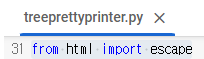

## [예제2] 간단한 영어 문장을 파싱하기 위한 문맥자유문법(CFG) 정의
문법 설명:

- S: 문장(Sentence)
- NP: 명사구(Noun Phrase)
- VP: 동사구(Verb Phrase)
- PP: 전치사구(Prepositional Phrase)
- Det: 한정사(Determiner)
- N: 명사(Noun)
- V: 동사(Verb)
- P: 전치사(Preposition)

In [17]:
grammar = nltk.CFG.fromstring("""
    S -> NP VP
    NP -> Det N | N
    VP -> V NP | VP PP | V
    PP -> P NP
    Det -> 'the' | 'a'
    N -> 'cat' | 'dog' | 'man' | 'telescope'
    V -> 'saw' | 'walked'
    P -> 'with' | 'in'
""")

In [18]:
parser = nltk.ChartParser(grammar)  # 정의한 문법을 사용하여 Chart Parser 생성

In [19]:
# 파싱할 문장을 토큰화하여 리스트로 준비
sentence = "the man saw the dog with the telescope".split()

In [27]:
# Chart Parser를 사용하여 문장 파싱
parses = list(parser.parse(sentence))

In [29]:
# 파싱 결과 출력
for tree in parses:
    print(tree)
    tree.pretty_print()

(S
  (NP (Det the) (N man))
  (VP
    (VP (V saw) (NP (Det the) (N dog)))
    (PP (P with) (NP (Det the) (N telescope)))))
                 S                                
      ___________|_______                          
     |                   VP                       
     |            _______|________                 
     |           VP               PP              
     |        ___|___         ____|___             
     NP      |       NP      |        NP          
  ___|___    |    ___|___    |     ___|______      
Det      N   V  Det      N   P   Det         N    
 |       |   |   |       |   |    |          |     
the     man saw the     dog with the     telescope

